In [1]:
%matplotlib inline
import networkx as nx
import math
from matplotlib import pyplot as plt
from collections import deque
from heapq import heappop, heappush

In [2]:
def heuristic(a, b, positions):
    # Euclidean distance
    (x1, y1) = positions[a]
    (x2, y2) = positions[b]
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def astar(graph, start, goal, positions):
    priority_queue = []
    heappush(priority_queue, (0, start))  # (f-cost, node)

    g_cost = {start: 0}  # Cost from start to each node
    came_from = {}  # Path tracking

    while priority_queue:
        _, current = heappop(priority_queue)  # Get node with lowest f-cost

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor in graph.neighbors(current):
            new_g = g_cost[current] + graph[current][neighbor]["weight"]  # g-cost

            if neighbor not in g_cost or new_g < g_cost[neighbor]:
                g_cost[neighbor] = new_g
                f_cost = new_g + heuristic(neighbor, goal, positions)
                heappush(priority_queue, (f_cost, neighbor))
                came_from[neighbor] = current

    return None  # No path found


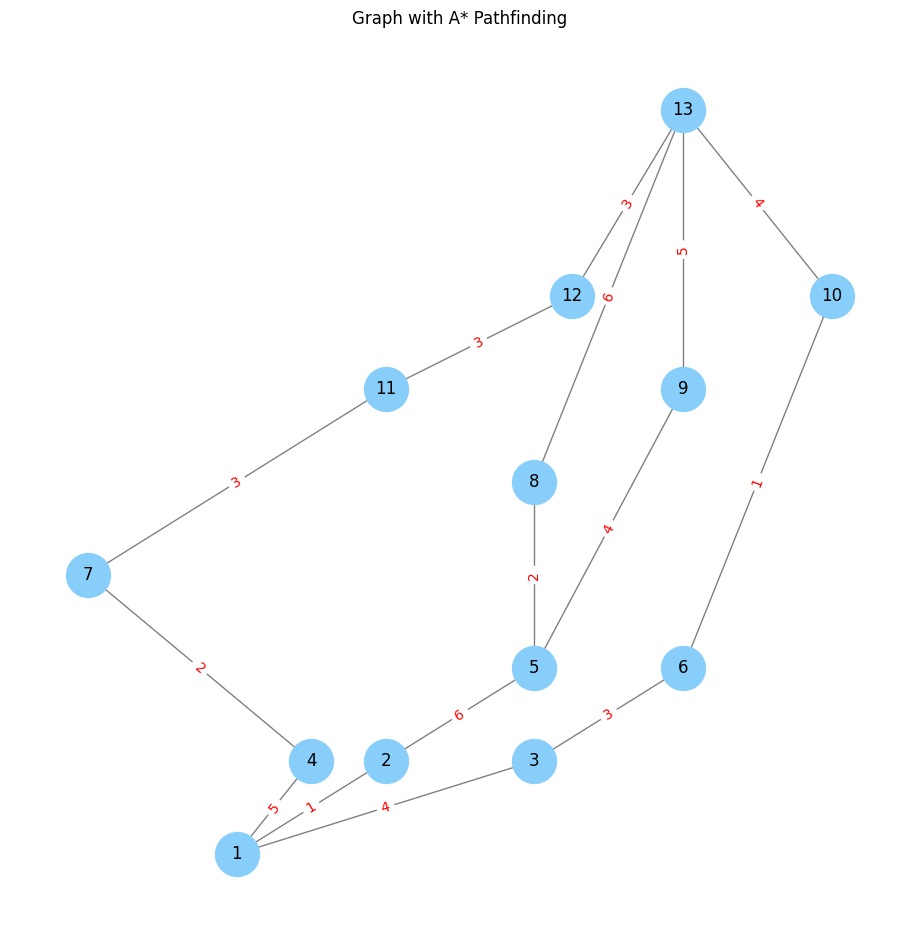

In [8]:
# Step 1: Create Graph
graph = nx.Graph()

# Define edges with weights
# edges = [
#     ('1', '2', 1), ('1', '3', 4), ('1', '4', 2),
#     ('2', '5', 6),
#     ('3', '6', 3),
#     ('4', '7', 5),
#     ('5', '8', 2), ('5', '9', 4),
#     ('6', '10', 1),
#     ('7', '11', 3),
#     ('8', '11', 6),
#     ('9', '11', 5),
#     ('10', '11', 4)
        
# ]

edges = [
    ('1', '2', 1), ('1', '3', 4), ('1', '4', 5),
    ('2', '5', 6),
    ('3', '6', 3),
    ('4', '7', 2),
    ('5', '8', 2), ('5', '9', 4),
    ('6', '10', 1),
    ('7', '11', 3), 
    ('8', '13', 6),
    ('9', '13', 5),
    ('10', '13', 4),
    ('11', '12', 3),
    ('12', '13',  3),
        
]

# Add edges with weights
graph.add_weighted_edges_from(edges)

# Define node positions for Euclidean heuristic
positions = {
    '1': (0, 0), '2': (1, 1), '3': (2, 1), '4': (0.5, 1),
    '5': (2, 2), '6': (3, 2), '7': (-1, 3),
    '8': (2, 4), '9': (3, 5), '10': (4, 6), '11': (1, 5),
    '12': (2.25, 6), '13': (3,8) 
}

# Draw graph
plt.figure(figsize=(9, 9))
pos = positions  # Use predefined positions for nodes
nx.draw(graph, pos, with_labels=True, node_color="lightskyblue", edge_color="gray", node_size=1000, font_size=12)
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color="red")
plt.title("Graph with A* Pathfinding")
plt.show()

In [9]:
# call astar function

start_node = '1'
goal_node = '13'
path = astar(graph, start_node, goal_node, positions)

print("Shortest Path Found:", path)

Shortest Path Found: ['1', '3', '6', '10', '13']
